## Objective

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.


In [20]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# Obtain the train data

In [21]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.head()

C:\Users\ABHISEK\Anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [22]:
train.shape

(7352, 564)

# Obtain the test data

In [23]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.head()

C:\Users\ABHISEK\Anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [24]:
test.shape

(2947, 564)

# Data Cleaning

## Check for Duplicates

In [25]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## Checking for NaN/null values

In [26]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## Check for data imbalance

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

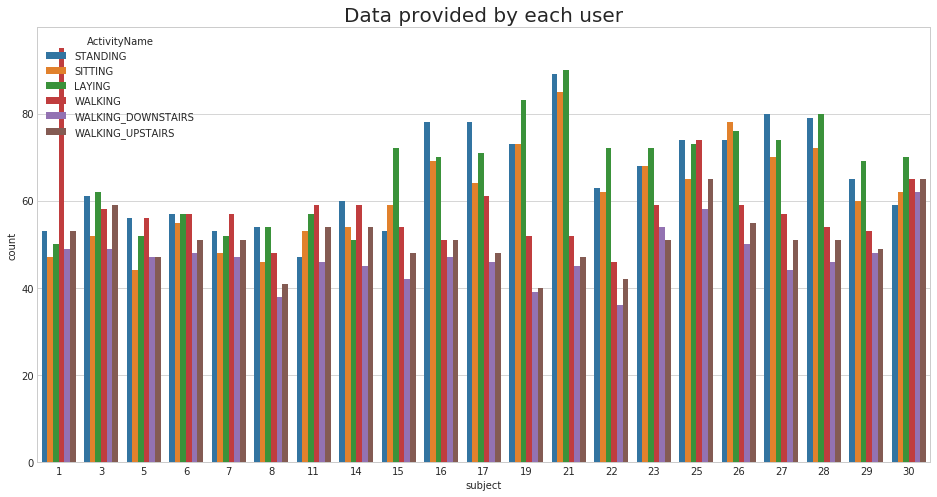

In [28]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

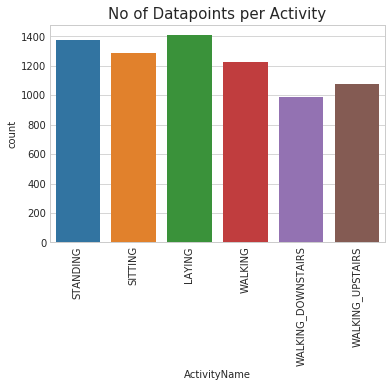

In [29]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

# Changing feature names

In [30]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## Save this dataframe in a csv files

In [31]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

## Importing Important Libraries For EDA and ML Model

In [1]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE

### Featuring Engineering from Domain Knowledge 


+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.


### Stationary and Moving activities are completely different

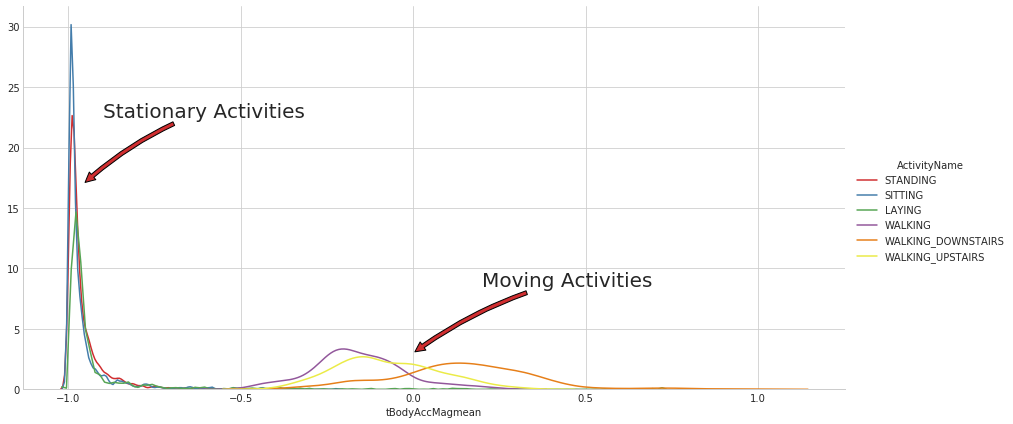

In [33]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

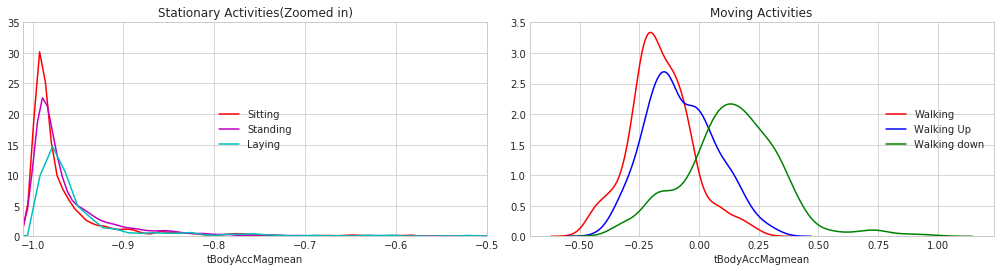

In [34]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### Magnitude of an acceleration can saperate it well

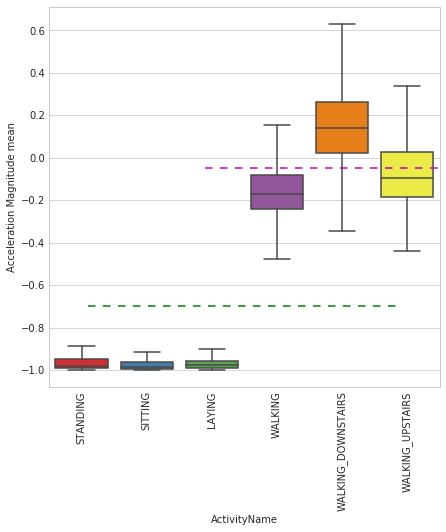

In [35]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### Position of GravityAccelerationComponants also matters

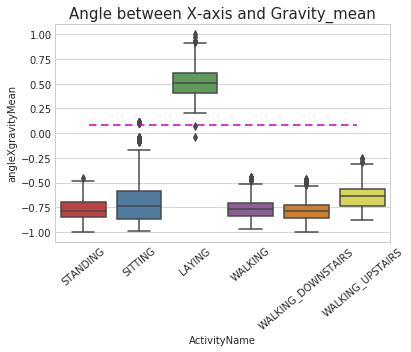

In [36]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

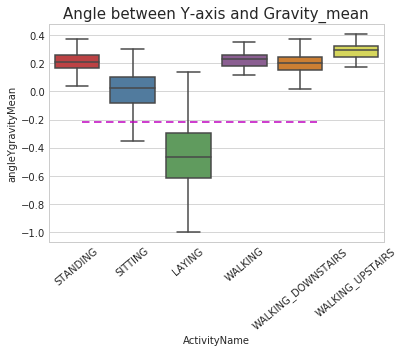

In [37]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

### Let's Find Some Highly Correlated features and keep high variance data

In [38]:
feature_cols = train.columns[: -1]   #exclude the Activity column
#Calculate the correlation values
correlated_values = train[feature_cols].corr()
#stack the data and convert to a dataframe

correlated_values = (correlated_values.stack().to_frame().reset_index()
                    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlations'}))
correlated_values.head()

,Feature_1,Feature_2,Correlations
0,tBodyAccmeanX,tBodyAccmeanX,1.000000
1,tBodyAccmeanX,tBodyAccmeanY,0.148061
2,tBodyAccmeanX,tBodyAccmeanZ,-0.256952
3,tBodyAccmeanX,tBodyAccstdX,0.000619
4,tBodyAccmeanX,tBodyAccstdY,-0.021903


In [39]:
#create an abs_correlation column
correlated_values['abs_correlation'] = correlated_values.Correlations.abs()
correlated_values.head()

,Feature_1,Feature_2,Correlations,abs_correlation
0,tBodyAccmeanX,tBodyAccmeanX,1.000000,1.000000
1,tBodyAccmeanX,tBodyAccmeanY,0.148061,0.148061
2,tBodyAccmeanX,tBodyAccmeanZ,-0.256952,0.256952
3,tBodyAccmeanX,tBodyAccstdX,0.000619,0.000619
4,tBodyAccmeanX,tBodyAccstdY,-0.021903,0.021903


In [40]:
#Picking most correlated features
train_fields = correlated_values.sort_values('Correlations', ascending = False).query('abs_correlation>0.8')
train_fields.sample(5)

,Feature_1,Feature_2,Correlations,abs_correlation
316666,Activity,tBodyGyroJerkMagentropy,-0.812061,0.812061
7683,tBodyAccminY,fBodyAccJerkiqrY,-0.944975,0.944975
187327,fBodyAccbandsEnergy1724.2,fBodyAccJerkbandsEnergy1724.2,0.992449,0.992449
162677,fBodyAccentropyY,fBodyBodyGyroMagsma,0.894947,0.894947
47867,tBodyAccJerkstdZ,tBodyAccminX,-0.871294,0.871294


In [73]:
#Getting the features with high Variance and split the data into train and test

low_var = VarianceThreshold(threshold=(0.05))

train_new = pd.DataFrame(low_var.fit_transform(train.iloc[:, :-2]))
                         
test_new = pd.DataFrame(low_var.transform(test.iloc[:, :-2]))


In [74]:
train_new.head()

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0
1,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0
2,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0
3,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0
4,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0


## Apply t-sne on the data

In [45]:
# performs t-sne with different perplexity values and their repective plots..
import itertools
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=next(itertools.cycle(['1','2','3','4', '5','6'])))
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.269s...
[t-SNE] Computed neighbors for 7352 samples in 5.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.473103
[t-SNE] Computed conditional probabilities in 0.166s
[t-SNE] Iteration 50: error = 124.3036270, gradient norm = 0.0395341 (50 iterations in 13.350s)
[t-SNE] Iteration 100: error = 104.5990829, gradient norm = 0.0297970 (50 iterations in

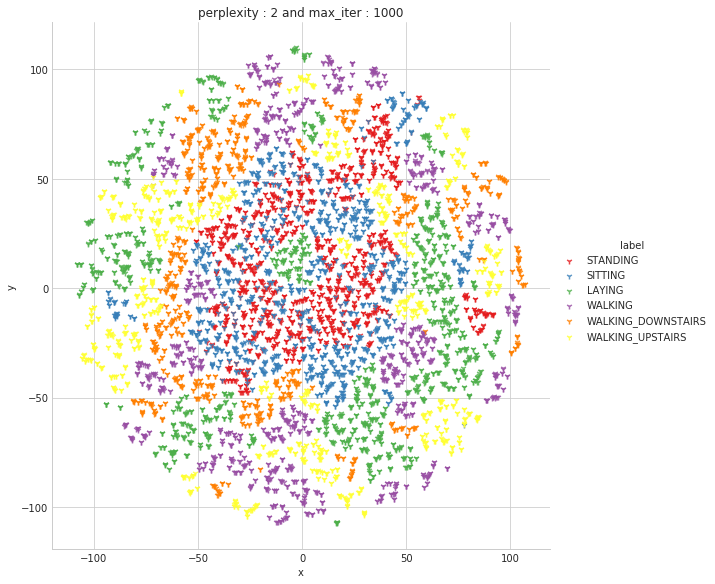

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.112s...
[t-SNE] Computed neighbors for 7352 samples in 5.467s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.788687
[t-SNE] Computed conditional probabilities in 0.072s
[t-SNE] Iteration 50: error = 113.0272141, gradient norm = 0.0351513 (50 iterations in 12.935s)
[t-SNE] Iteration 100: error = 92.7864227, gradient norm = 0.0172338 (50 iteratio

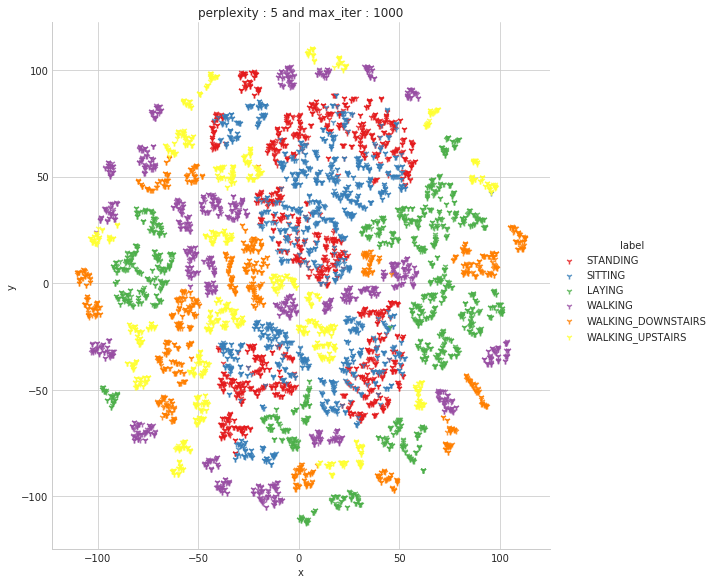

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.108s...
[t-SNE] Computed neighbors for 7352 samples in 5.780s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.982181
[t-SNE] Computed conditional probabilities in 0.121s
[t-SNE] Iteration 50: error = 102.8153000, gradient norm = 0.0374772 (50 iterations in 11.388s)
[t-SNE] Iteration 100: error = 83.8137436, gradient norm = 0.0124832 (50 iterati

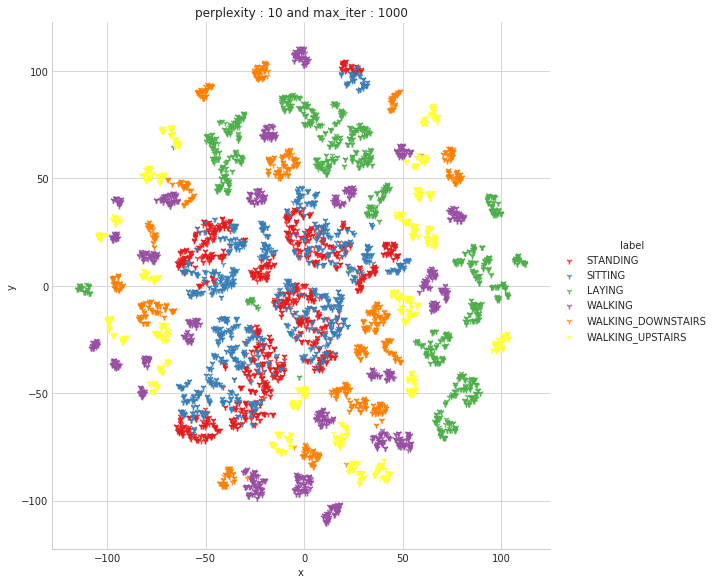

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.127s...
[t-SNE] Computed neighbors for 7352 samples in 6.432s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.175821
[t-SNE] Computed conditional probabilities in 0.234s
[t-SNE] Iteration 50: error = 94.1805344, gradient norm = 0.0371102 (50 iterations in 12.564s)
[t-SNE] Iteration 100: error = 75.5542831, gradient norm = 0.0094680 (50 iteratio

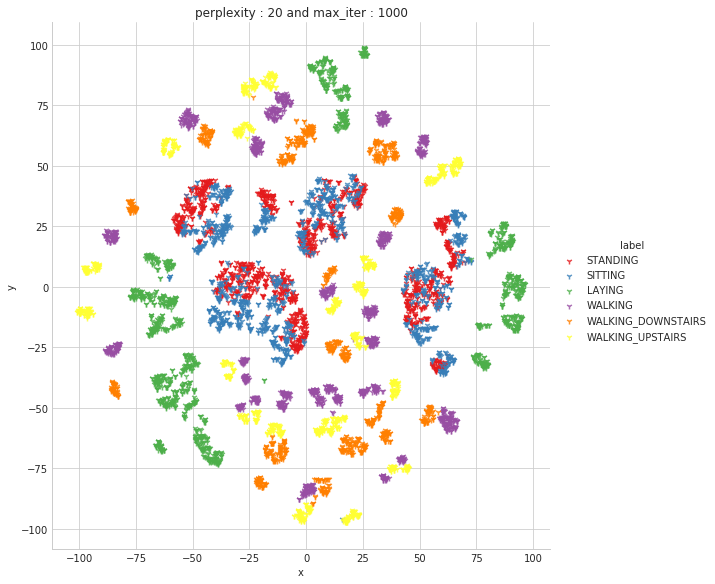

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.106s...
[t-SNE] Computed neighbors for 7352 samples in 7.748s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.459034
[t-SNE] Computed conditional probabilities in 0.574s
[t-SNE] Iteration 50: error = 81.9450150, gradient norm = 0.0323353 (50 iterations in 19.748s)
[t-SNE] Iteration 100: error = 66.1767807, gradient norm = 0.0071524 (50 iterati

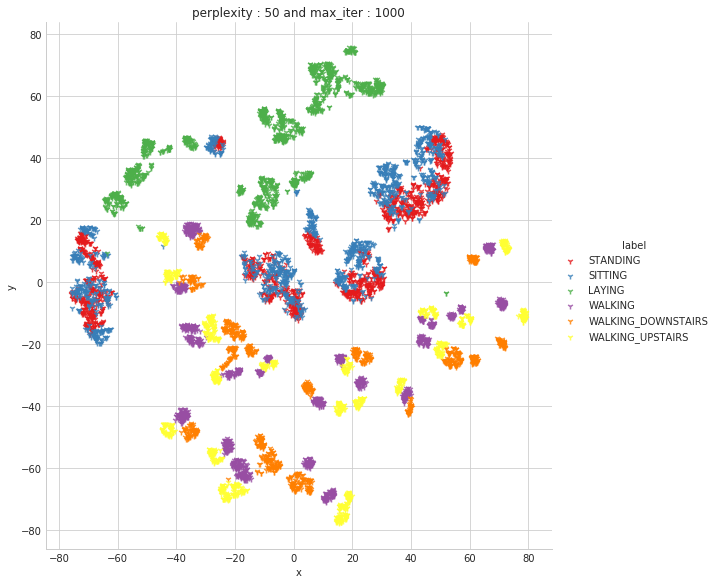

Done


In [46]:
perform_tsne(X_data =train_new,y_data=train['ActivityName'], perplexities =[2,5,10,20,50]) 

### Function to plot the confusion matrix

In [47]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [48]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

### Method to print the gridsearch Attributes

In [49]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

In [50]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Logistic Regression with Grid Search

In [51]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [62]:
train.iloc[:, -1:].head()

,ActivityName
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [75]:
file = open('train_new.pkl', 'wb')
pickle.dump(train_new, file)
file.close()

In [76]:
file = open('test_new.pkl', 'wb')
pickle.dump(test_new, file)
file.close()

In [77]:
file = open('y_train_new.pkl', 'wb')
pickle.dump(train.iloc[:, -1:], file)
file.close()

In [78]:
file = open('y_test_new.pkl', 'wb')
pickle.dump(test.iloc[:, -1:], file)
file.close()

In [79]:
import pickle
file = open('train_new.pkl', 'rb')
train_new = pickle.load(file)
file.close()

In [80]:
file = open('test_new.pkl', 'rb')
test_new = pickle.load(file)
file.close()

In [81]:
file = open('y_train_new.pkl', 'rb')
y_train_new = pickle.load(file)
file.close()

In [82]:
file = open('y_test_new.pkl', 'rb')
y_test_new = pickle.load(file)
file.close()

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.5min finished
C:\Users\ABHISEK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done 
 

training_time(HH:MM:SS.ms) - 0:02:06.889723


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005982


---------------------
|      Accuracy      |
---------------------

    0.9633525619273838


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 427  59   0   0   5]
 [  0  11 520   1   0   0]
 [  0   0   0 492   1   3]
 [  0   0   0   3 412   5]
 [  0   0   0  20   0 451]]


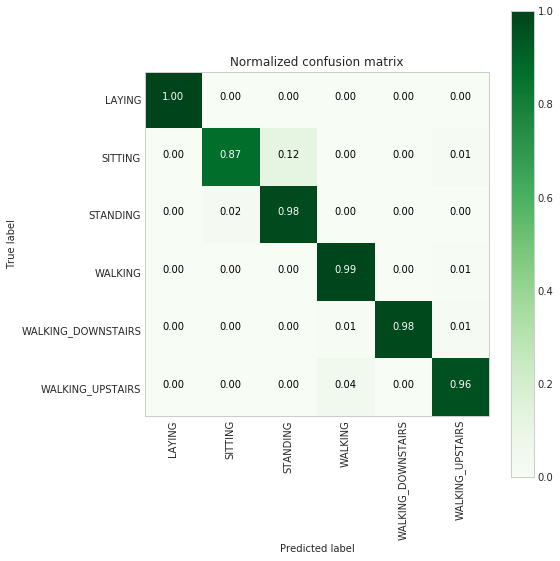

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.97      0.96      0.96       471

       avg / total       0.96      0.96      0.96      2947



In [83]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=6, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, train_new, y_train_new, test_new, y_test_new, class_labels=labels)


In [84]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l1'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9328073993471164



### Linear SVC with GridSearch

In [85]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   35.1s finished
C:\Users\ABHISEK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:41.760314


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005983


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 427  59   0   0   5]
 [  0   8 522   2   0   0]
 [  0   0   0 494   0   2]
 [  0   0   0   3 411   6]
 [  0   0   0  24   0 447]]


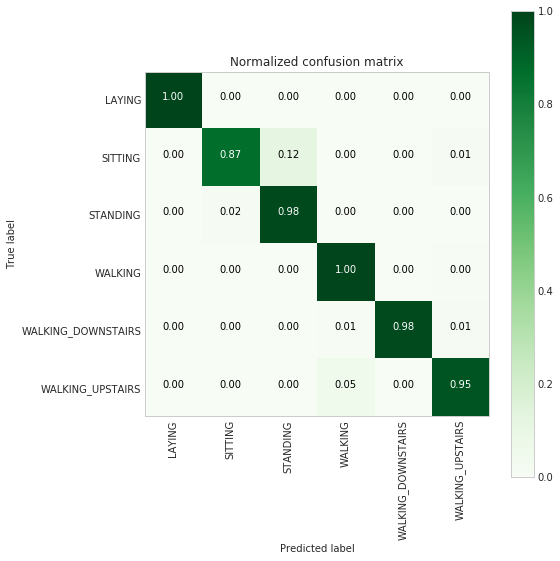

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.94      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



In [86]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, train_new, y_train_new, test_new, y_test_new, class_labels=labels)

In [87]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.125, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9171653971708379



### Kernel SVM with GridSearch

training the model..


C:\Users\ABHISEK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done 
 

training_time(HH:MM:SS.ms) - 0:05:14.186927


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.316462


---------------------
|      Accuracy      |
---------------------

    0.9334916864608076


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 421  69   0   0   1]
 [  0  26 506   0   0   0]
 [  0   0   0 487   9   0]
 [  0   0   0  26 367  27]
 [  0   0   0  35   3 433]]


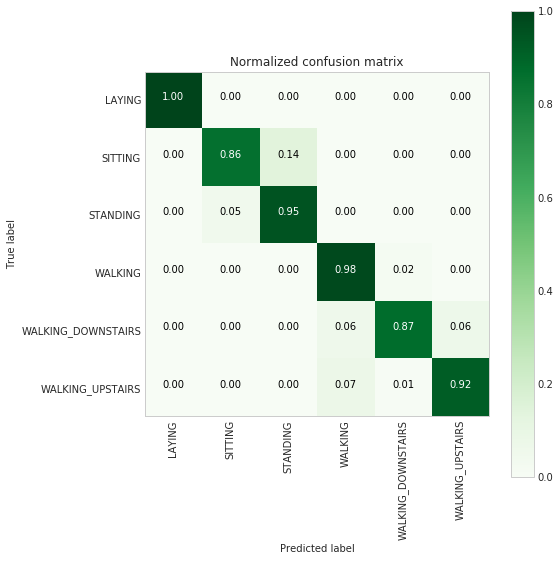

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.86      0.90       491
          STANDING       0.88      0.95      0.91       532
           WALKING       0.89      0.98      0.93       496
WALKING_DOWNSTAIRS       0.97      0.87      0.92       420
  WALKING_UPSTAIRS       0.94      0.92      0.93       471

       avg / total       0.94      0.93      0.93      2947



In [89]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, train_new, y_train_new, test_new, y_test_new, class_labels=labels)

In [90]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 2, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.7324537540805223



### Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:13.572711


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006981


---------------------
|      Accuracy      |
---------------------

    0.8408551068883611


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 391 100   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 408  15  73]
 [  0   0   0  35 332  53]
 [  0   0   0  79  21 371]]


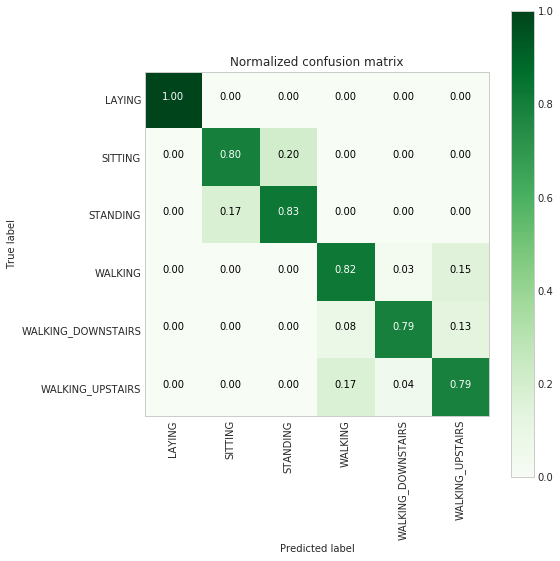

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.80      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.78      0.82      0.80       496
WALKING_DOWNSTAIRS       0.90      0.79      0.84       420
  WALKING_UPSTAIRS       0.75      0.79      0.77       471

       avg / total       0.84      0.84      0.84      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

--------

In [91]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, train_new, y_train_new, test_new, y_test_new, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

### Random Forest Classifier with GridSearch

training the model..


C:\Users\ABHISEK\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Done 
 

training_time(HH:MM:SS.ms) - 0:06:27.426103


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.067815


---------------------
|      Accuracy      |
---------------------

    0.8876823888700374


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 408  83   0   0   0]
 [  0  68 463   0   0   1]
 [  0   0   0 483  11   2]
 [  0   0   0  72 300  48]
 [  0   0   0  40   6 425]]


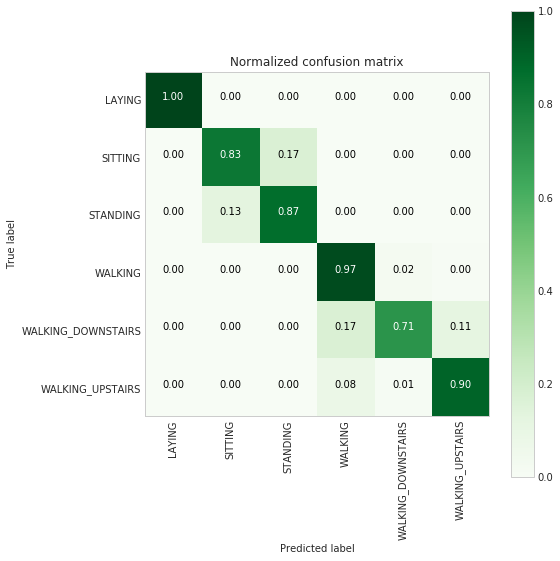

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.83      0.84       491
          STANDING       0.85      0.87      0.86       532
           WALKING       0.81      0.97      0.89       496
WALKING_DOWNSTAIRS       0.95      0.71      0.81       420
  WALKING_UPSTAIRS       0.89      0.90      0.90       471

       avg / total       0.89      0.89      0.89      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=1,
            oob_score=Fals

In [92]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, train_new, y_train_new, test_new, y_test_new, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

### Gradient Boosted Decision Trees With GridSearch

training the model..


C:\Users\ABHISEK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done 
 

training_time(HH:MM:SS.ms) - 0:37:58.440086


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.091780


---------------------
|      Accuracy      |
---------------------

    0.9168646080760094


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 403  87   0   0   1]
 [  0  41 491   0   0   0]
 [  0   0   0 476   7  13]
 [  0   0   0  14 372  34]
 [  0   1   0  41   6 423]]


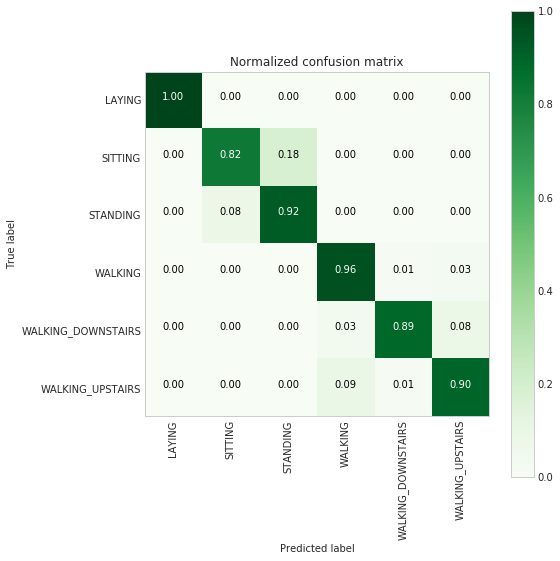

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.82      0.86       491
          STANDING       0.85      0.92      0.88       532
           WALKING       0.90      0.96      0.93       496
WALKING_DOWNSTAIRS       0.97      0.89      0.92       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

       avg / total       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimato

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, train_new, y_train_new, test_new, y_test_new, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

### Apply Deep Learning on RAW data 

In [28]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [3]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [4]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [5]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [6]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [7]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [9]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [10]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [8]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.constraints import maxnorm
import pandas as pd
import numpy as np

C:\Users\ABHISEK\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [10]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [11]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [12]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [38]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_115 (LSTM)              (None, 32)                5376      
_________________________________________________________________
dropout_39 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [40]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 57s 8ms/step - loss: 1.3284 - acc: 0.4468 - val_loss: 1.1059 - val_acc: 0.5694
Epoch 2/30
7352/7352 [==============================] - 33s 5ms/step - loss: 0.9850 - acc: 0.5922 - val_loss: 0.8868 - val_acc: 0.6498
Epoch 3/30
7352/7352 [==============================] - 31s 4ms/step - loss: 0.8095 - acc: 0.6700 - val_loss: 0.9324 - val_acc: 0.6084
Epoch 4/30
7352/7352 [==============================] - 31s 4ms/step - loss: 0.7152 - acc: 0.7243 - val_loss: 0.7833 - val_acc: 0.6990
Epoch 5/30
7352/7352 [==============================] - 31s 4ms/step - loss: 0.6640 - acc: 0.7353 - val_loss: 0.8119 - val_acc: 0.7306
Epoch 6/30
7352/7352 [==============================] - 37s 5ms/step - loss: 0.6517 - acc: 0.7542 - val_loss: 1.2314 - val_acc: 0.6396
Epoch 7/30
7352/7352 [==============================] - 38s 5ms/step - loss: 0.5361 - acc: 0.7987 - val_loss: 0.7373 - val_acc: 0.7788
Epoch 8

In [41]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

score = model.evaluate(X_test, Y_test)
print(score)

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 511        0         0        0                   0   
SITTING                  0      375       114        0                   0   
STANDING                 0       80       450        2                   0   
WALKING                  0        0         0      489                   6   
WALKING_DOWNSTAIRS       0        0         0       24                 374   
WALKING_UPSTAIRS         0        0         2       17                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            26  
SITTING                            2  
STANDING                           0  
WALKING                            1  
WALKING_DOWNSTAIRS                22  
WALKING_UPSTAIRS                 451  
2947/2947 [==============================] - 2s 576us/step
[0.3

In [13]:
dropout_rate = [0.2, 0.5, 0.7]
neurons = [32, 64, 128, 256]
param_grid = dict(neurons=neurons, dropout_rate=dropout_rate)

def create_model(neurons=1, dropout_rate=0.0):
    # create model
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(timesteps, input_dim), return_sequences=True))
    model.add(LSTM(neurons, input_shape=(timesteps, input_dim), return_sequences=True))
    model.add(LSTM(neurons, input_shape=(timesteps, input_dim)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
    return model

In [14]:
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=5)

In [15]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, verbose = 5)

In [16]:
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] dropout_rate=0.2, neurons=32 ....................................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  dropout_rate=0.2, neurons=32, score=0.9245206038351693, total= 7.3min
[CV] dropout_rate=0.2, neurons=32 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.5min remaining:    0.0s


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  dropout_rate=0.2, neurons=32, score=0.9094247246022031, total= 7.0min
[CV] dropout_rate=0.2, neurons=32 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 14.5min remaining:    0.0s


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  dropout_rate=0.2, neurons=32, score=0.8648979591836735, total= 7.1min
[CV] dropout_rate=0.2, neurons=64 ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 21.8min remaining:    0.0s


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  dropout_rate=0.2, neurons=64, score=0.937984496124031, total= 8.2min
[CV] dropout_rate=0.2, neurons=64 ....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 30.2min remaining:    0.0s


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  dropout_rate=0.2, neurons=64, score=0.8894328845369237, total= 8.4min
[CV] dropout_rate=0.2, neurons=64 ....................................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  dropout_rate=0.2, neurons=64, score=0.9081632653061225, total= 8.2min
[CV] dropout_rate=0.2, neurons=128 ...................................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  dropout_rate=0.2, neurons=128, score=0.9555283557731539, total=14.9min
[CV] dropout_rate=0.2, neurons=128 ...................................
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
[CV]  dropout_rate=0.2, neurons=128, score=0.7429620563035496, total=15.4min
[CV] dropout_rate=0.2, neurons=128 ..

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 1517.0min finished


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [17]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.913901 using {'dropout_rate': 0.5, 'neurons': 128}
0.899619 (0.025309) with: {'dropout_rate': 0.2, 'neurons': 32}
0.911861 (0.019994) with: {'dropout_rate': 0.2, 'neurons': 64}
0.870647 (0.091914) with: {'dropout_rate': 0.2, 'neurons': 128}
0.853781 (0.047817) with: {'dropout_rate': 0.2, 'neurons': 256}
0.809440 (0.110016) with: {'dropout_rate': 0.5, 'neurons': 32}
0.897171 (0.028296) with: {'dropout_rate': 0.5, 'neurons': 64}
0.913901 (0.022853) with: {'dropout_rate': 0.5, 'neurons': 128}
0.777339 (0.229311) with: {'dropout_rate': 0.5, 'neurons': 256}
0.831338 (0.046868) with: {'dropout_rate': 0.7, 'neurons': 32}
0.819777 (0.027064) with: {'dropout_rate': 0.7, 'neurons': 64}
0.784820 (0.096513) with: {'dropout_rate': 0.7, 'neurons': 128}
0.613303 (0.037116) with: {'dropout_rate': 0.7, 'neurons': 256}


In [27]:
pd.Categorical(grid_result.predict(X_test))

[4, 4, 4, 4, 4, ..., 1, 1, 1, 1, 1]
Length: 2947
Categories (6, int64): [0, 1, 2, 3, 4, 5]

In [24]:
Y_test

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_test_cat = enc.fit_transform(grid_result.predict(X_test).reshape(-1, 1))
X_test_cat

<2947x6 sparse matrix of type '<class 'numpy.float64'>'
	with 2947 stored elements in Compressed Sparse Row format>

In [33]:
print(confusion_matrix(Y_test, X_test_cat.toarray()))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 536        0         0        0                   0   
SITTING                  7      404        61        0                   0   
STANDING                 0       82       449        1                   0   
WALKING                  0        0         0      448                   6   
WALKING_DOWNSTAIRS       0        0         0        0                 385   
WALKING_UPSTAIRS         0        0         0        2                   0   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             1  
SITTING                           19  
STANDING                           0  
WALKING                           42  
WALKING_DOWNSTAIRS                35  
WALKING_UPSTAIRS                 469  


In [34]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, X_test_cat.toarray(), normalize=True) * float(100)
print('\n****Test accuracy %d%%' % (acc))


****Test accuracy 91%


## Summary:

<b>Data Loading:</b>
There are given two types of datasets, one contains hand crafted features which are given by domain experts. another dataset is raw data from Accelerometer and Gyroscope readings.

<b>EDA:</b>
we need to do univariate and multivariate analysis and check if there is any correlation among features and remove highly correlated features by taking
variance threshould as 0.05. Apply dimensionality reduction technique and do scatter plot to check if classes are separable.

<b>Matrices:</b>
we will check both logloss and confusion matrix for model performance.
performance.

<b>Model Fitting:</b>
we have used multiple models and could find Logistic Regression performes good. Apart
from Logistic Regression, Linear SVC, GBDT and LSTM also performs well.

In [44]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model", "Test_Accuracy"]
x.add_row(["LogisticReg","0.9633525619273838"])
x.add_row(["Linear SVC","0.9630132337970818"])
x.add_row(["Kernel SVM","0.9334916864608076"])
x.add_row(["Decision Trees","0.8408551068883611"])
x.add_row(["Random Forest","0.8876823888700374"])
x.add_row(["Gradient Boosted","0.9168646080760094"])
x.add_row(["Simple HSTM","0.8992195453003053"])
x.add_row(["Hypertuned LSTM","0.913901"])
print(x)


+------------------+--------------------+
|      Model       |   Test_Accuracy    |
+------------------+--------------------+
|   LogisticReg    | 0.9633525619273838 |
|    Linear SVC    | 0.9630132337970818 |
|    Kernel SVM    | 0.9334916864608076 |
|  Decision Trees  | 0.8408551068883611 |
|  Random Forest   | 0.8876823888700374 |
| Gradient Boosted | 0.9168646080760094 |
|   Simple HSTM    | 0.8992195453003053 |
| Hypertuned LSTM  |      0.913901      |
+------------------+--------------------+
